<a href="https://colab.research.google.com/github/edwinapalmer/DS-Unit-1-Sprint-2-Statistics/blob/master/Introduction_to_Bayesian_Inference_Edwina_Palmer_LS_DS_123_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



In [136]:
# TODO - code!

# To calculate probability that a person is drunk after one positive breathalyzer test

# True Positive Rate
true_pos_rate = 1
# Prior Probability
prob_drunk_prior = .001
# False Positive Rate
false_pos_rate = .08
# Complement of the prior (1-event == complement)
p_not_drunk = .999

numerator = true_pos_rate * prob_drunk_prior

denominator = (true_pos_rate * prob_drunk_prior) + (false_pos_rate * p_not_drunk)

posterior_probability = numerator / denominator

posterior_probability

0.012357884330202669

In [137]:
# To calculate probability that a person is drunk after two positive breathalyzer test

# True Positive Rate
true_pos_rate = 1
# Prior Probability
prob_drunk_prior = 0.012357884330202669
# False Positive Rate
false_pos_rate = .08
# Complement of the prior (1-event == complement)
p_not_drunk = 1 - prob_drunk_prior

numerator = true_pos_rate * prob_drunk_prior

denominator = (true_pos_rate * prob_drunk_prior) + (false_pos_rate * p_not_drunk)

posterior_probability = numerator / denominator

posterior_probability


0.13525210993291495

In [138]:
# Probability that's greater than 95% that a person is drunk beyond the legal limit

# True Positive Rate
true_pos_rate = 1
# Prior Probability
prob_drunk_prior = 0.13525210993291495
# False Positive Rate
false_pos_rate = .08
# Complement of the prior (1-event == complement)
p_not_drunk = 1 - prob_drunk_prior

numerator = true_pos_rate * prob_drunk_prior

denominator = (true_pos_rate * prob_drunk_prior) + (false_pos_rate * p_not_drunk)

posterior_probability = numerator / denominator

posterior_probability



0.6615996951348605

In [139]:
# Probability that's greater than 95% that a person is drunk beyond the legal limit

# True Positive Rate
true_pos_rate = 1
# Prior Probability
prob_drunk_prior = 0.6615996951348605
# False Positive Rate
false_pos_rate = .08
# Complement of the prior (1-event == complement)
p_not_drunk = 1 - prob_drunk_prior

numerator = true_pos_rate * prob_drunk_prior

denominator = (true_pos_rate * prob_drunk_prior) + (false_pos_rate * p_not_drunk)

posterior_probability = numerator / denominator

posterior_probability


0.9606895076105054

In [140]:
# Probability that's greater than 95% that a person is drunk beyond the legal limit

# True Positive Rate
true_pos_rate = 1
# Prior Probability
prob_drunk_prior = 0.9606895076105054
# False Positive Rate
false_pos_rate = .08
# Complement of the prior (1-event == complement)
p_not_drunk = 1 - prob_drunk_prior

numerator = true_pos_rate * prob_drunk_prior

denominator = (true_pos_rate * prob_drunk_prior) + (false_pos_rate * p_not_drunk)

posterior_probability = numerator / denominator

posterior_probability

0.9967371577896734

# Got to 96% results on 4th try, and 99% at 5th try.

In [0]:
prob_drunk_given_positive(0.9198622415220412, .08)

#cancel code.

2. Explore scipy.stats.bayes_mvs

In [143]:
# Import congress voting records data
!wget 'https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data'

--2020-04-16 18:36:12--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data.1’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.06s   

2020-04-16 18:36:12 (279 KB/s) - ‘house-votes-84.data.1’ saved [18171/18171]



In [0]:
import numpy as np 
from scipy import stats 
from scipy.stats import norm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [144]:
votes=pd.read_csv('house-votes-84.data',header=None,
                      names=["handicapped-infants", "water-project-cost-sharing", "adoption-of-the-budget-resolution",
                            "physician-fee-freeze", "el-salvador-aid", "religious-groups-in-schools", "anti-satellite-test-ban",
                            "aid-to-nicaraguan-contras", "mx-missile", "immigration", "synfuels-corporation-cutback",  
                            "education-spending", "superfund-right-to-sue", "crime", "duty-free-exports", 
                            "export-administration-act-south-africa"])
print(votes.shape)
votes.head()

(435, 16)


,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [145]:
# To clean up data

votes = votes.replace({'y': 1, 'n': 0, '?': np.NaN})

votes.head()

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [146]:
votes.isnull().sum()

handicapped-infants                        12
water-project-cost-sharing                 48
adoption-of-the-budget-resolution          11
physician-fee-freeze                       11
el-salvador-aid                            15
religious-groups-in-schools                11
anti-satellite-test-ban                    14
aid-to-nicaraguan-contras                  15
mx-missile                                 22
immigration                                 7
synfuels-corporation-cutback               21
education-spending                         31
superfund-right-to-sue                     25
crime                                      17
duty-free-exports                          28
export-administration-act-south-africa    104
dtype: int64

In [147]:
dems = votes[(votes.index=='democrat')]
dems.head()

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0
democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
democrat,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0


In [148]:
reps = votes[(votes.index=='republican')]
reps.head()

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,1.0
republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
republican,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,1.0,0.0,0.0


In [149]:
dems['el-salvador-aid'].isnull().sum()

12

In [150]:
dems['el-salvador-aid'].describe()

count    255.000000
mean       0.215686
std        0.412106
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: el-salvador-aid, dtype: float64

In [0]:
# To calculate confidence intervals

def confidence_interval(data, confidence=0.95):

  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  stderr = stats.sem(data)
  interval = stderr * stats.t.ppf((1 + confidence) / 2.0, n - 1)
  return (mean, mean - interval, mean + interval)

In [152]:
#Frequentist method

CI_freq = confidence_interval(votes['el-salvador-aid'].dropna())
CI_freq

(0.5047619047619047, 0.4567501383795156, 0.5527736711442939)

In [153]:
# stats.bayes_mvs() method  

res_mean, res_var, res_std = stats.bayes_mvs(votes['el-salvador-aid'].dropna())
res_mean

Mean(statistic=0.5047619047619047, minmax=(0.4644965222855801, 0.5450272872382294))

In [0]:
# Check the mean confidence interval using bayesian formula

mean_CI, _, _ = stats.bayes_mvs('el-salvador-aid', alpha=.95).dropna()

mean_CI[1][0]

#cancel code

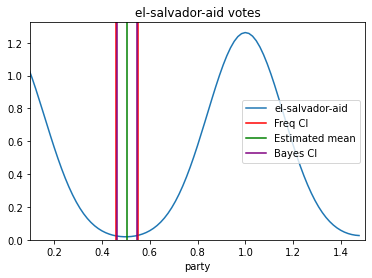

In [155]:
sns.kdeplot(votes['el-salvador-aid'])

plt.title('el-salvador-aid votes')
plt.xlabel('party')

# Plot Frequentist Confidence Intervals
plt.axvline(x=CI_freq[1], color='red', label='Freq CI')
plt.axvline(x=CI_freq[2], color='red')

# Plot Estimated Mean
plt.axvline(x=CI_freq[0], color='green', label='Estimated mean')

# Plot Bayesian Confidence Intervals
plt.axvline(res_mean.minmax[0], color='purple', label='Bayes CI')
plt.axvline(res_mean.minmax[1], color='purple')

plt.legend()
plt.xlim(0.1, 1.5);

3. Summarize the difference between Bayesian and Frequentist statistics

In Frequentist statistics, the sampling has no bounds and decision rules are sharp. The data are usually repeatable random sample with frequencies. Underlying parameters are fixed during this repeatable sampling process.

In Bayesian statistics, an unknown quantity is treated with a probabilistic approach and its state can always be updated. The data are observed from the realised sample. The underlying parameters are unknown and are described using probabilities. The data is fixed in this case.

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!